# SpinW demonstration

We'll demonstrate some capabilities of SpinW, based on data on Bi$_4$Fe$_5$O$_{13}$F, which has a fairly complex magnetic structure and exchange interactions.

The data and analysis is summarised in this paper: https://doi.org/10.1103/PhysRevB.103.104423

First we have to import SpinW. SpinW is actually a Matlab program, but it has a "compiled" interface which can be used from Python. However, for this to work you either need to have Matlab installed (with a license) or to have downloaded and install the Matlab Compiler Runtime (available here: https://www.mathworks.com/products/compiler/matlab-runtime.html). SpinW is compatible with versions R2021a to R2023a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyspinw import Matlab
m = Matlab()

Trying MATLAB version: R2021a (C:\Users\User\AppData\Local\mambaforge\envs\ralindia\lib\site-packages\pyspinw\ctfs\SpinW_2021a.ctf))
Interface opened


In [2]:
%matlab_plot_mode?

In [3]:
%matlab_plot_mode inline
%matlab_fig -w 400 -h 300 -r 100

In [4]:
%matlab_plot_mode windowed console

In the next very dense cell we define a function which returns a `spinw` object for a particular set of exchange interactions for a spin-wave model of Bi$_4$Fe$_5$O$_{13}$F.

In [5]:
def bfof_struct(a0, a34, ac, b0):
    from numpy import cos, sin, pi
    a0, a34, ac, b0 = tuple((np.array([a0, a34, ac, b0]) / 180. * pi).tolist())
    S3 = np.array([[cos(a0), sin(a0), 0]]).T
    S3p = np.array([[cos(a0+pi/2), sin(a0+pi/2), 0]]).T
    T3 = np.array([[cos(b0), sin(b0), 0]]).T
    T3p = np.array([[cos(b0+pi/2), sin(b0+pi/2), 0]]).T
    S4 = np.array([[cos(a34), sin(a34), 0]]).T
    S4p = np.array([[cos(a34+pi/2), sin(a34+pi/2), 0]]).T
    Sc = np.array([[cos(ac), sin(ac), 0]]).T
    Scp = np.array([[cos(ac+pi/2), sin(ac+pi/2), 0]]).T
    M = np.hstack((S4p, S4, S4, S4p, S4p, S4, S4, S4p, T3p, -T3p, -S3p, S3p, T3, -T3, 
                   S3, -S3, -Scp, -Sc, -Scp, -Sc))
    return np.hstack((M, -M, -M, M))

def bfof_sw(J):
    J33, J43, J43p, J44, Jc, A, Ap = tuple(J)
    bfof = m.spinw()
    bfof.genlattice('lat_const',[8.29950, 8.29950, 18.05730],'angled',[90, 90, 90],'sym','P 42/m b c')
    bfof.addatom('r',[0.5,  0.,   0.0800],'S',2.5,'color',[0, 0, 255],'label','Fe3+')
    bfof.addatom('r',[0.8515, 0.8388, 0], 'S',2.5,'color',[255, 0, 0],'label','Fe3+')
    bfof.addatom('r',[0.5,  0.,   0.25  ],'S',2.5,'color',[0, 0, 128],'label','Fe3+')
    bfof.gencoupling('maxDistance',10);
    bfof.addmatrix('value',J44,'label','J44','color','r');         bfof.addcoupling('mat','J44','bond',1)
    bfof.addmatrix('value',Jc,'label','Jc','color',[128,0,0]);     bfof.addcoupling('mat','Jc','bond',2)
    bfof.addmatrix('value',J43,'label','J43','color','b');         bfof.addcoupling('mat','J43','bond',3)
    bfof.addmatrix('value',J43p,'label','J43p','color',[0,255,0]); bfof.addcoupling('mat','J43p','bond',4)
    bfof.addmatrix('value',J33,'label','J33','color','k');         bfof.addcoupling('mat','J33','bond',5)
    bfof.addmatrix('value',np.diag([0, 0, A]),'label','D1');       bfof.addaniso('D1', 1);
    bfof.addmatrix('value',np.diag([0, 0, A]),'label','D2');       bfof.addaniso('D2', 2);
    bfof.addmatrix('value',np.diag([0, 0, Ap]),'label','D3');      bfof.addaniso('D3', 3);
    S0 = bfof_struct(111, 224, 224, 180)
    bfof.genmagstr('mode', 'direct', 'S', S0, 'nExt', [2, 2, 1]);
    return bfof

# Create an object with the parameters from the PRB paper
bfof = bfof_sw([28.9272, 4.1644, 6.3627, -0.3104, 0.4949, 0.0453, 0.3246])
m.plot(bfof, 'range', [[0,2],[0,2],[0.25, 0.75]])

Creating the bond list (maxDistance = 10 Å, nCell = 2x2x1)...
...620 bonds are retained out of 18000 generated!

Creating 3D plot... 
...32k faces and 20k vertices are drawn!



<proxy for Matlab matlab.ui.Figure object>

Now we try to plot a dispersion along some high symmetry lines.

Calculating COMMENSURATE spin wave spectra (nMagExt = 80, nHkl = 134, nTwin = 1)...
To optimise memory allocation, Q is cut into 20 pieces!
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
  5.00%, remained: 000:00:07 (HH:MM:SS).
 10.00%, remained: 000:00:07 (HH:MM:SS).
 15.00%, remained: 000:00:07 (HH:MM:SS).
 20.00%, remained: 000:00:06 (HH:MM:SS).
 25.00%, remained: 000:00:06 (HH:MM:SS).
 30.00%, remained: 000:00:05 (HH:MM:SS).
 35.00%, remained: 000:00:05 (HH:MM:SS).
 40.00%, remained: 000:00:04 (HH:MM:SS).


<proxy for Matlab matlab.ui.Figure object>

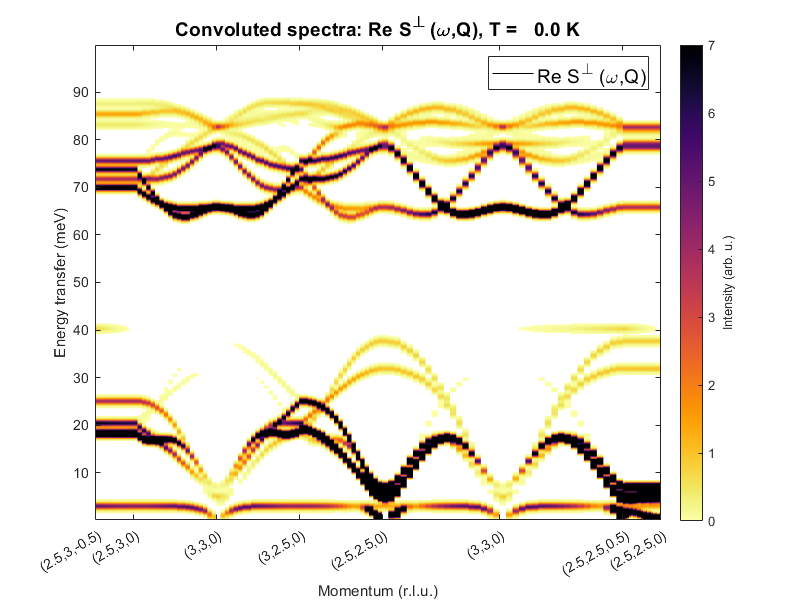

In [6]:
%matlab_plot_mode inline

qpts = [[2.5, 3., -0.5], [2.5, 3, 0], [3, 3, 0], [3, 2.5, 0], [2.5, 2.5, 0], 
        [3, 3, 0], [2.5, 2.5, 0.5], [2.5, 2.5, 0], 20]
spec = bfof.spinwave(qpts, 'hermit', False, 'optmem', 20);
specn = m.sw_neutron(spec);
spech = m.sw_egrid(specn,'Evect',np.linspace(0,100,500),'imagChk',False)
m.sw_plotspec(spech,'mode','color','dE',1)

Now we do a powder calculation - this can take a couple of minutes.

In [7]:
bfofpowspec = bfof.powspec(np.linspace(0,5,20),'Evect',np.linspace(0,100,500),'imagChk',False,
                           'nRand',500,'fibo',True,'hermit',False,'formfact',True,'optmem',50)
m.sw_plotspec(bfofpowspec,'mode','color','dE',1)

Calculating powder spectra...
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
  5.00%, remained: 000:07:23 (HH:MM:SS).
 10.00%, remained: 000:07:23 (HH:MM:SS).
 15.00%, remained: 000:07:15 (HH:MM:SS).
 20.00%, remained: 000:06:56 (HH:MM:SS).
 25.00%, remained: 000:06:29 (HH:MM:SS).
 30.00%, remained: 000:06:02 (HH:MM:SS).
 35.00%, remained: 000:05:36 (HH:MM:SS).
 40.00%, remained: 000:05:10 (HH:MM:SS).
 45.00%, remained: 000:04:45 (HH:MM:SS).
 50.00%, remained

RuntimeError: MatlabExecutionError: 
  File "C:\Users\User\AppData\Local\Temp\User\mcrCache9.10\SpinW_10\Users\essspinw\actions-runner\_work\spinw\spinw\swfiles\private\sw_issymspec.m", line 29, function "sw_issymspec"
  File "C:\Users\User\AppData\Local\Temp\User\mcrCache9.10\SpinW_10\Users\essspinw\actions-runner\_work\spinw\spinw\swfiles\sw_plotspec.m", line 175, function "sw_plotspec"
  File "C:\Users\User\AppData\Local\Temp\User\mcrCache9.10\SpinW_10\SpinW_2021a\matlab\call.m", line 31, function "call"

sw_issymspec:WrongInput: Invalid input spectra structure


Text(0, 0.5, 'Energy (meV)')

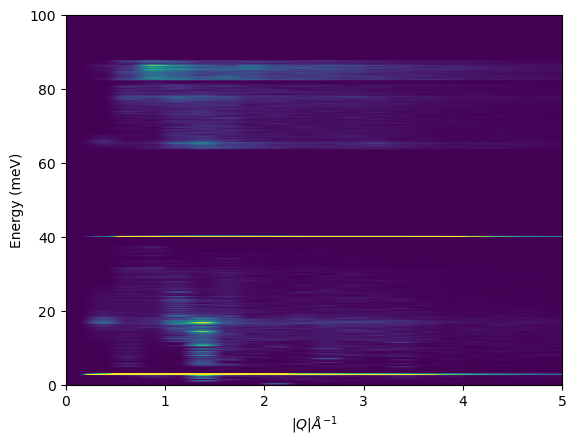

In [8]:
# These command should work but are currently giving an error
#m.sw_plotspec(bfofpowspec,'mode','color','dE',1)
#pspec = m.sw_instrument(bfofpowspec, 'dE', 0.2, 'dQ', 0.05, 'Ei', 16, 'ThetaMin', 3.5);

# Instead we have to use Matplotlib directly
qq = bfofpowspec['hklA']
ee = bfofpowspec['Evect']
ax = plt.imshow(np.flipud(bfofpowspec['swConv']), aspect='auto', vmax=1,
               extent=[qq[0][0], qq[0][-1], ee[0][0], ee[0][-1]])
plt.xlabel('$|Q| Å^{-1}$')
plt.ylabel('Energy (meV)')

As can be seen - that calculation takes quite a long time, so is not really suitable for fitting (e.g. each iteration would take too long). Instead we can try to make a smaller cut with less data, but which may be more diagnostic.

So, now we load the Mantid data (previously saved in another notebook due to a bug/incompatibility between Mantid and SpinW/Matlab), and plot the full 2D $S(Q,\omega)$ spectrum and then to make a small 1D cut from that near the magnetic Brillouin zone centre.

<ErrorbarContainer object of 3 artists>

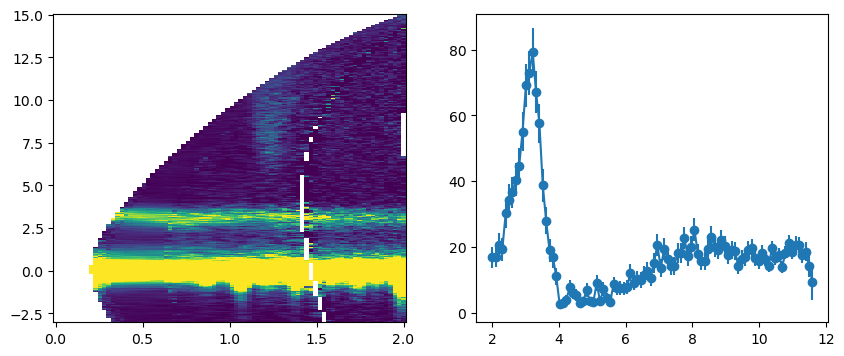

In [11]:
bfof_data = np.load('bfof_data.npy', allow_pickle=True).tolist()
(cut_en, cut_i, cut_e) = (bfof_data[k] for k in ['cut_en', 'cut_i', 'cut_e'])
(slice_q, slice_e, slice_int) = (bfof_data[k] for k in ['slice_q', 'slice_e', 'slice_int'])

# Checks the extracted data is ok and plots it
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].pcolormesh(slice_q, slice_e, slice_int.T, cmap='viridis', vmax=100)
ax[1].errorbar(cut_en, cut_i, cut_e, label="bi4fe5o13f_Ei16meV 1.10<|Q|<1.30", color="#1f77b4", marker="o", ls="-", lw=1.5)

In [12]:
# Now do a SpinW calculation for the small cut
bfofpowcut = bfof.powspec(np.linspace(1.1,1.3,4),'Evect',cut_en,'imagChk',False,
                          'nRand',500,'fibo',True,'hermit',False,'formfact',True,'optmem',5)

Calculating powder spectra...
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
 25.00%, remained: 000:01:11 (HH:MM:SS).
 50.00%, remained: 000:00:50 (HH:MM:SS).
 75.00%, remained: 000:00:24 (HH:MM:SS).
100.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:01:42 (hh:mm:ss).
Calculation finished.



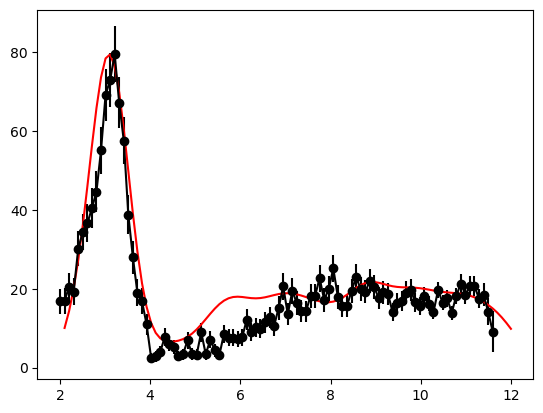

In [13]:
# Create a Gaussian of unit height centred at zero with desired FWHM 
FWHM = 2
resfun = np.exp(-0.5*(np.linspace(-5,5,50)/(FWHM/2.35))**2)
calc_sig = np.sum(bfofpowcut['swConv'],axis=1)
res_sig = np.convolve(calc_sig, resfun, 'same')

# Plots it with the data
scale =  np.nanmax(cut_i) / np.nanmax(res_sig)
plt.errorbar(cut_en, cut_i, cut_e, color="k", marker="o", ls="-", lw=1.5)
plt.plot(cut_en[1:], res_sig * scale, '-r')

In [ ]:
bfof.genmagstr('mode', 'direct', 'S', ones(3,80), 'nExt', [2 2 1]);
out = bfof.optmagstr('func', @bfof_structure, 'xmin', [0 0 0 0], 'xmax', [2*pi 2*pi 2*pi 2*pi], 'x0', [pi pi pi pi]);
bfof = out.obj;
bfof.cache.angs = [out.x([1 1 2])-out.x([4 2 3])]*180/pi;
out = optmagsteep(bfof,'nRun',1000);
bfof = out.obj;

Creating 3D plot... 
...32k faces and 20k vertices are drawn!



<proxy for Matlab matlab.ui.Figure object>

In [13]:
bfof = m.spinw()
bfof.genlattice('lat_const',[8.29950, 8.29950, 18.05730],'angled',[90, 90, 90],'sym','P 42/m b c')
bfof.addatom('r',[0.5,  0.,   0.0800],'S',2.5,'color',[0, 0, 255],'label','Fe3+')
bfof.addatom('r',[0.8515, 0.8388, 0], 'S',2.5,'color',[255, 0, 0],'label','Fe3+')
bfof.addatom('r',[0.5,  0.,   0.25  ],'S',2.5,'color',[0, 0, 128],'label','Fe3+')
bfof.gencoupling('maxDistance',10);
bfof.addmatrix('value',J44,'label','J44','color','r');         bfof.addcoupling('mat','J44','bond',1)
bfof.addmatrix('value',Jc,'label','Jc','color',[128,0,0]);     bfof.addcoupling('mat','Jc','bond',2)
bfof.addmatrix('value',J43,'label','J43','color','b');         bfof.addcoupling('mat','J43','bond',3)
bfof.addmatrix('value',J43p,'label','J43p','color',[0,255,0]); bfof.addcoupling('mat','J43p','bond',4)
bfof.addmatrix('value',J33,'label','J33','color','k');         bfof.addcoupling('mat','J33','bond',5)
bfof.addmatrix('value',np.diag([0, 0, A]),'label','D1');       bfof.addaniso('D1', 1);
bfof.addmatrix('value',np.diag([0, 0, A]),'label','D2');       bfof.addaniso('D2', 2);
bfof.addmatrix('value',np.diag([0, 0, Ap]),'label','D3');      bfof.addaniso('D3', 3);

Creating the bond list (maxDistance = 10 Å, nCell = 2x2x1)...
...620 bonds are retained out of 18000 generated!

Creating 3D plot... 
...27k faces and 16k vertices are drawn!



<proxy for Matlab matlab.ui.Figure object>

In [ ]:
def bfof_sw(J):
    Jc1, Jc2, Jab1, Jab2, Jd = tuple(J)
    bfof = m.spinw()
    bfof.genlattice('lat_const',[8.29950 8.29950 18.05730],'angled',[90 90 90],'sym','P 42/m b c')
    bfof.addatom('r',[0.5  0.   0.0800],'S',2.5,'color',[0 0 255],'label','Fe3+')
    bfof.addatom('r',[0.8515 0.8388 0], 'S',2.5,'color',[255 0 0],'label','Fe3+')
    bfof.addatom('r',[0.5  0.   0.25  ],'S',S3,'color',[0 0 128],'label','Fe3+')
    bfof.gencoupling('maxDistance',10);
    bfof.addmatrix('value',Jc1,'label','Jc1','color','r');         bfof.addcoupling('mat','Jc1','bond',1)
    bfof.addmatrix('value',Jc2,'label','Jc2','color',[128 0 0]);   bfof.addcoupling('mat','Jc2','bond',2)
    bfof.addmatrix('value',Jab1,'label','Jab1','color','b');       bfof.addcoupling('mat','Jab1','bond',3)
    bfof.addmatrix('value',Jab2,'label','Jab2','color',[0 255 0]); bfof.addcoupling('mat','Jab2','bond',4)
    bfof.addmatrix('value',Jd,'label','Jd','color','k');           bfof.addcoupling('mat','Jd','bond',5)
    

In [ ]:
# We first import Mantid and some other common libraries.
import mantid.simpleapi
import mslice.cli as mc
import mslice.plotting.pyplot as mplt

import os
data_folder = os.path.join(os.getcwd(), '..', 'datafiles')
# You may need to rename this to some actual directory where the data are.
# The above code assumes you downloaded the zip of the course materials and did not change the path of this notebook.
#data_folder = r'c:\some\path\to\the\datafiles'

# Loads the data and make a 2D slice
ws_aluminium_Ei60 = mc.Load(Filename=f'{data_folder}/aluminium_Ei60.nxspe', OutputWorkspace='aluminium_Ei60')
slice_ws = mc.Slice(ws_aluminium_Ei60, Axis1="|Q|, 0, 11, 0.05", Axis2="DeltaE,-20.0, 55, 0.5", NormToOne=False)

# This code will instead plot (a non-interactive graph) inline within the notebook
ax = plt.subplot(111, projection='mantid')
ax.pcolormesh(mc.Transpose(slice_ws).raw_ws, cmap='viridis', vmax=1)